# Disjointification Example

- Demonstrates feature selection through disjointification
- Data is an example of gene expression on patients

## defs/imports/loads

In [1]:
import disjointification
from disjointification import load_gene_expression_data, Disjointification
from pathlib import Path
from pprint import pprint
import pandas as pd
import numpy as np

In [2]:
load_last_save_point = False

# shrink the dataset for debugging
select_num_features = 1.0
select_num_instances = 1.0
alert_selection = True
debug_print = False
model_save_folder = r"c:\model"
last_save_point = r"model\06_24_2023__10_58_52\06_24_2023__10_59_03_(3069, 9260).pkl"
alert_selection = True
min_num_features = 500
correlation_threshold = 0.7

In [3]:
if load_last_save_point:
    test = disjointification.from_file(last_save_point)
else:
    if 'labels_df' not in locals() or 'features_df' not in locals():
        print(f"Dataframes not loaded. Loading.")
        ge_data = load_gene_expression_data()
        features_df = ge_data["features"]
        labels_df = ge_data["labels"]
        print(f"features_df loaded with shape {features_df.shape}")
        print(f"labels_df loaded with shape {labels_df.shape}")
    test = Disjointification(features_file_path=None, labels_file_path=None, features_df=features_df, 
                             labels_df=labels_df, select_num_features=select_num_features, select_num_instances=select_num_instances, 
                             root_save_folder=model_save_folder, do_set=False, alert_selection=alert_selection, 
                             correlation_threshold=correlation_threshold, min_num_features=min_num_features)
    test.set()
test.describe()

Dataframes not loaded. Loading.
features_df loaded with shape (3069, 9266)
labels_df loaded with shape (3069, 8)
saving model...
saved model to C:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl
Disjointification Test Description
features data: (3069, 9260)
labels data: (3069, 2)
min num of features to keep in disjointification: 500
correlation threshold: 0.7
last save point: c:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl


In [6]:
last_save_point = test.last_save_point_file
print('last save point:')
print(last_save_point)
test = disjointification.from_file(last_save_point)

last save point:
c:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl


test.describe()

In [8]:
force_corr= True
do_corr = np.any([force_corr, test.features_selected_in_disjointification_lin in [None,[]], test.features_selected_in_disjointification_log in [None,[]]])

if do_corr:    
    start_time = disjointification.utils.get_dt_in_fmt()
    print(f"{start_time} Running Disjointificatioin")
    test.run_disjointification()

pprint(f"features selected in disjointification lin: \n{test.features_selected_in_disjointification_lin}")
pprint(f"features selected in disjointification log: \n{test.features_selected_in_disjointification_log}")

06_24_2023__18_33_03 Running Disjointificatioin
saving model...
saved model to C:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl
saving model...
saved model to C:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl
('features selected in disjointification lin: \n'
 "['LCK', 'PLCG2', 'SLA', 'GIMAP6', 'FCRL2', 'B2M', 'HLA-DOA', 'ZBTB32', "
 "'TNFRSF17', 'FCER2', 'KLRC1', 'VNN2', 'LAIR2', 'BCL2A1', 'HSD11B1', 'FXYD2', "
 "'CD1B', 'STK17B', 'P2RX5', 'TCF7', 'STX11', 'GP1BA', 'RASSF2', 'SLCO5A1', "
 "'FNBP1', 'IL15', 'DEF6', 'VCAM1', 'GPR25', 'CASP4', 'VAMP5', 'CAMK4', "
 "'LAP3', 'CR1', 'APOBEC3C', 'SYK', 'DUSP2', 'CCL4', 'BTN3A2', 'GBP2', "
 "'SIPA1', 'SLC12A3', 'LY96', 'FOXN2', 'CSK', 'RAB8B', 'DOCK10', 'PLA1A', "
 "'TMEM140', 'STK4', 'CCL17', 'CXCL13', 'CRLF3', 'PIP4K2A', 'CCL13', 'PTPN6', "
 "'MAP3K14', 'IL7', 'CXCR4', 'NMI', 'WNT1', 'BTN2A2', 'P2RY6', 'TCN2', "
 "'CYTH1', 'MATK', 'CCL22', 'ARAP2', 'NECAP2', 'MSL3', 'CD101', 'TRIM21', "
 "'GMIP', 'MX2', 'ITM2C', 'PPP2R2B', 'HLA-DQ

In [10]:
print(f"Last saved {test.last_save_point_file} at {test.last_save_time}")

Last saved c:\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl at 06_25_2023__00_50_25


C:\Users\oDror\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


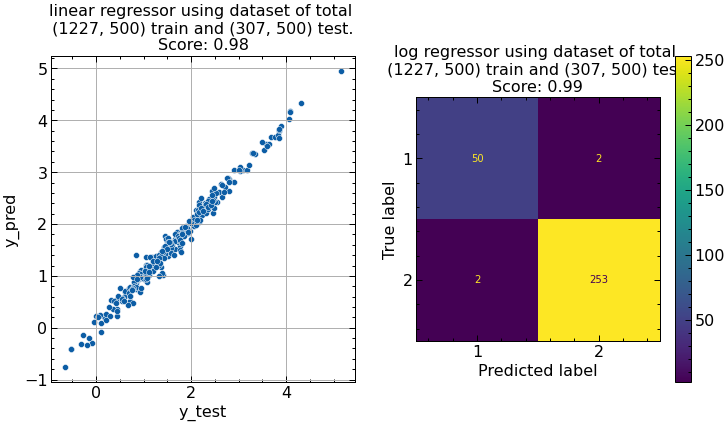

In [7]:
test.run_regressions()
test.show()

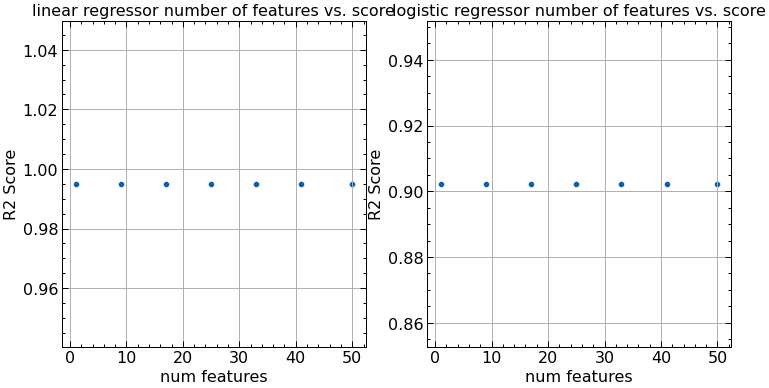

In [12]:
test.sweep_regression()
test.show_regressor_sweep()

In [ ]:
# TODOS

# VISUALIZE
# RANDOMFOR

In [ ]:
test.features_df[test.features_already_selected_lin].shape

## Meeting 24/05

- Disjointification should be done - 
- RF + Lasso benchmark
- Let's try OOB solutions - genetic?
- Propose other methods ? 
- RFE
- Can test another method that'll reduce to 500 and then do the same
